# Preparação do ambiente

## Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from os import path as osp
from tqdm.auto import tqdm
from unicodedata import normalize
from wordcloud import WordCloud

## Constantes e funções auxiliares

In [2]:
FILE_LABELS_RESULTS = '../datasets/samples_labeling/issues_fiscaliza/20240423/results/labels.parquet'

In [3]:
def clean_text(doc, return_tokens=False):

    stop_words = stopwords.words('portuguese')
    stop_words.extend(stopwords.words('english'))
    stop_words.extend(list(string.punctuation))
    
    # stopwords específicas do domínio
    # stop_words.extend(['cm', 'feature', 'features', 'informações', 'itens', 'leve', 'list', 'nulo', 'package', 'pacote', 'pacotes', 'recurso', 'tamanho', 'ver'])
    # remover da lista de stopwords a palavra sem para formar o bigrama "sem fio", relevante para o domínio
    # primeira rodada de classificação demonstrou que não foi uma boa escolha
    # stop_words.remove('sem')
    
    doc = doc.lower()
    doc = normalize('NFKD', doc).encode('ASCII', 'ignore').decode('ASCII')

    tokens = [token for token in word_tokenize(doc, language='portuguese') if token not in stop_words]

    if return_tokens:
        return tokens
    else:
        return ' '.join(tokens)

# Carga e prepação dos dados

In [4]:
df_items = pd.read_parquet(FILE_LABELS_RESULTS)
df_items['doc'] = df_items['titulo'].map(clean_text)
df_items['tokens'] = df_items['titulo'].apply(lambda doc: clean_text(doc, return_tokens=True))

columns_to_keep = ['id', 'titulo', 'doc', 'tokens', 
                   'titulo_bem_elaborado', 'titulo_identifica_produto',
                   'passivel_homologacao', 'transmissor_rf', 'tipo_produto']

df_items = df_items[columns_to_keep]
df_items

,id,titulo,doc,tokens,titulo_bem_elaborado,titulo_identifica_produto,passivel_homologacao,transmissor_rf,tipo_produto
0,125728,Streaming Box S Tucson 2018 A 2022 Carplay 4g ...,streaming box tucson 2018 2022 carplay 4g wi-f...,"[streaming, box, tucson, 2018, 2022, carplay, ...",1,1,1,1,TV Box/TV Stick
1,125729,Smartphone Motorola Moto G52 XT2221-1 Dual Sim...,smartphone motorola moto g52 xt2221-1 dual sim...,"[smartphone, motorola, moto, g52, xt2221-1, du...",1,1,1,1,Smartphones
2,125730,Notebook Dell Latitude 7490 I5 8ª Ger Ddr4 16g...,notebook dell latitude 7490 i5 8a ger ddr4 16g...,"[notebook, dell, latitude, 7490, i5, 8a, ger, ...",1,1,1,1,Computador ou notebook
3,125731,"Mini rede sem fio, placa de rede sem fio USB 3...",mini rede fio placa rede fio usb 3.0 adaptador...,"[mini, rede, fio, placa, rede, fio, usb, 3.0, ...",1,1,1,1,Transceptor de radiação restrita (2.4GHz/5.8GHz)
4,125732,"Fone Bluetooth TWS Kaidi KD-771 - 5.1, Touch, ...",fone bluetooth tws kaidi kd-771 5.1 touch prov...,"[fone, bluetooth, tws, kaidi, kd-771, 5.1, tou...",1,1,1,1,Transceptor de radiação restrita (2.4GHz/5.8GHz)
...,...,...,...,...,...,...,...,...,...
19004,125716,Conector de cauda de celular 10 pcs carregando...,conector cauda celular 10 pcs carregando conec...,"[conector, cauda, celular, 10, pcs, carregando...",1,1,0,0,Outro tipo/categoria (não listada acima)
19005,125717,Avantree Medley Clear - Fones de ouvido sem fi...,avantree medley clear fones ouvido fio ouvir t...,"[avantree, medley, clear, fones, ouvido, fio, ...",1,1,1,1,Transceptor de radiação restrita (2.4GHz/5.8GHz)
19006,125718,"Hilitand Adaptador sem fio, placa de rede sem ...",hilitand adaptador fio placa rede fio adaptado...,"[hilitand, adaptador, fio, placa, rede, fio, a...",1,1,1,1,Transceptor de radiação restrita (2.4GHz/5.8GHz)
19007,125707,Drone Vectron Quadricoptero Tamanho G - Polibrinq,drone vectron quadricoptero tamanho g polibrinq,"[drone, vectron, quadricoptero, tamanho, g, po...",1,1,1,1,Drone


# Análise preliminar

## Conteúdo do título

### Palavras mais frequentes

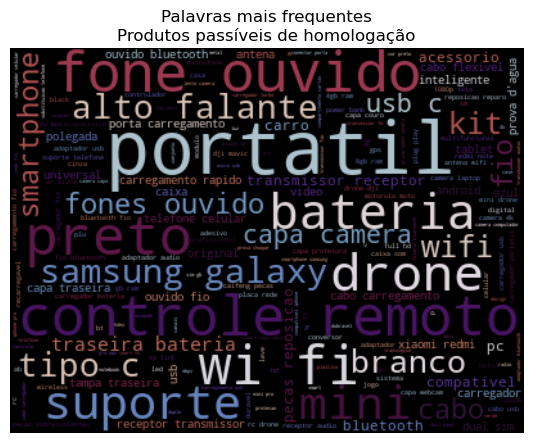

In [5]:
words = ' '.join(df_items['doc'])

wc = WordCloud(height=300,random_state=1,colormap='twilight').generate(words)

fig,ax = plt.subplots(1,1,figsize=(7,5))
ax.imshow(wc, interpolation="bilinear")
ax.axis("off")
ax.set_title('Palavras mais frequentes\nProdutos passíveis de homologação')
plt.show()

### Produtos passíveis e não passíveis de homologação

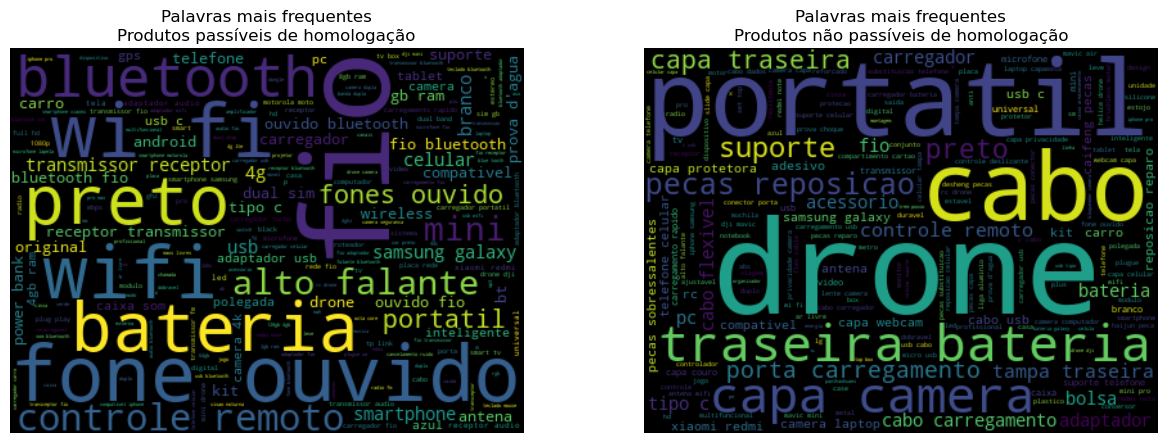

In [6]:
docs_passivel_homologacao = df_items[df_items['passivel_homologacao']==1]['doc']
docs_nao_passivel_homologacao = df_items[df_items['passivel_homologacao']==0]['doc']

words_passivel_homologacao = ' '.join(docs_passivel_homologacao)
words_nao_passivel_homologacao = ' '.join(docs_nao_passivel_homologacao)

wc_passivel_homologacao = WordCloud(height=300).generate(words_passivel_homologacao)
wc_nao_passivel_homologacao = WordCloud(height=300).generate(words_nao_passivel_homologacao)
  
fig,ax = plt.subplots(1,2,figsize=(15,5))
    
ax[0].imshow(wc_passivel_homologacao, interpolation="bilinear")
ax[0].axis("off")
ax[0].set_title('Palavras mais frequentes\nProdutos passíveis de homologação')

ax[1].imshow(wc_nao_passivel_homologacao, interpolation="bilinear")
ax[1].axis("off")
ax[1].set_title('Palavras mais frequentes\nProdutos não passíveis de homologação')

plt.show()

### Produtos transmissores e não transmissores de radiofrequência

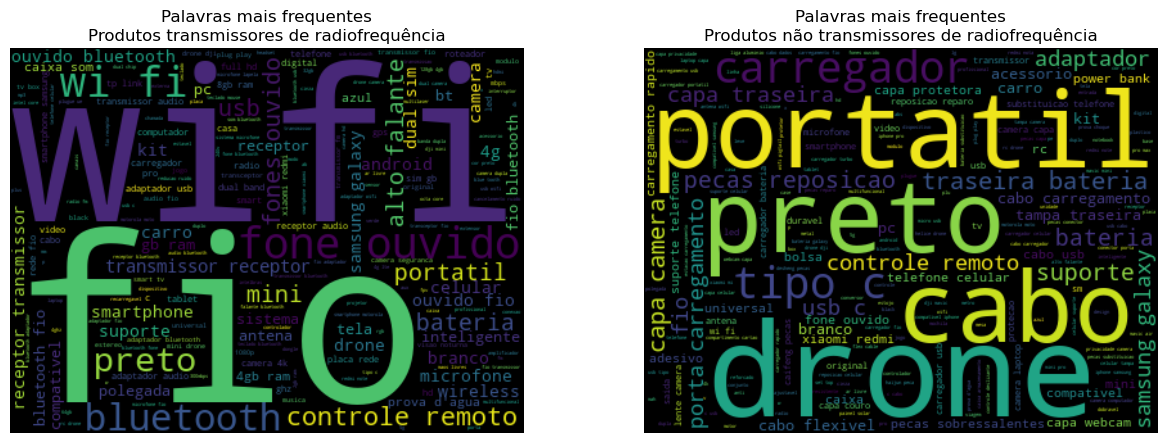

In [7]:
docs_transmissor_rf = df_items[df_items['transmissor_rf']==1]['doc']
docs_nao_transmissor_rf = df_items[df_items['transmissor_rf']==0]['doc']

words_transmissor_rf = ' '.join(docs_transmissor_rf)
words_nao_transmissor_rf = ' '.join(docs_nao_transmissor_rf)

wc_transmissor_rf = WordCloud(height=300).generate(words_transmissor_rf)
wc_nao_transmissor_rf = WordCloud(height=300).generate(words_nao_transmissor_rf)
  
fig,ax = plt.subplots(1,2,figsize=(15,5))
    
ax[0].imshow(wc_transmissor_rf, interpolation="bilinear")
ax[0].axis("off")
ax[0].set_title('Palavras mais frequentes\nProdutos transmissores de radiofrequência')

ax[1].imshow(wc_nao_transmissor_rf, interpolation="bilinear")
ax[1].axis("off")
ax[1].set_title('Palavras mais frequentes\nProdutos não transmissores de radiofrequência')

plt.show()

### Investigar drone

In [8]:
df_drones = df_items[df_items['doc'].str.contains('drone')]
df_drones.tipo_produto.value_counts()

tipo_produto
Outro tipo/categoria (não listada acima)                  764
Drone                                                     709
Não é possível afirmar                                    170
Transceptor de radiação restrita (2.4GHz/5.8GHz)           47
Bateria não destinada a celular                            34
Carregador ou fonte não destinada a celular                19
Transceptor de radiofrequência (VHF/UHF)                    7
Reforçador/repetidor de sinal de celular (2G/3G/4G/5G)      1
Smartphones                                                 1
Carregador para celular (inclusive powerbank)               1
Name: count, dtype: int64

In [9]:
df_drones.pivot_table(index='tipo_produto', columns='passivel_homologacao', values='id', aggfunc='count').fillna(0).astype('int')

passivel_homologacao,0,1,2
tipo_produto,,,
Bateria não destinada a celular,31,0,3
Carregador ou fonte não destinada a celular,19,0,0
Carregador para celular (inclusive powerbank),0,1,0
Drone,0,708,1
Não é possível afirmar,67,2,101
Outro tipo/categoria (não listada acima),695,33,36
Reforçador/repetidor de sinal de celular (2G/3G/4G/5G),0,1,0
Smartphones,0,1,0
Transceptor de radiação restrita (2.4GHz/5.8GHz),0,47,0


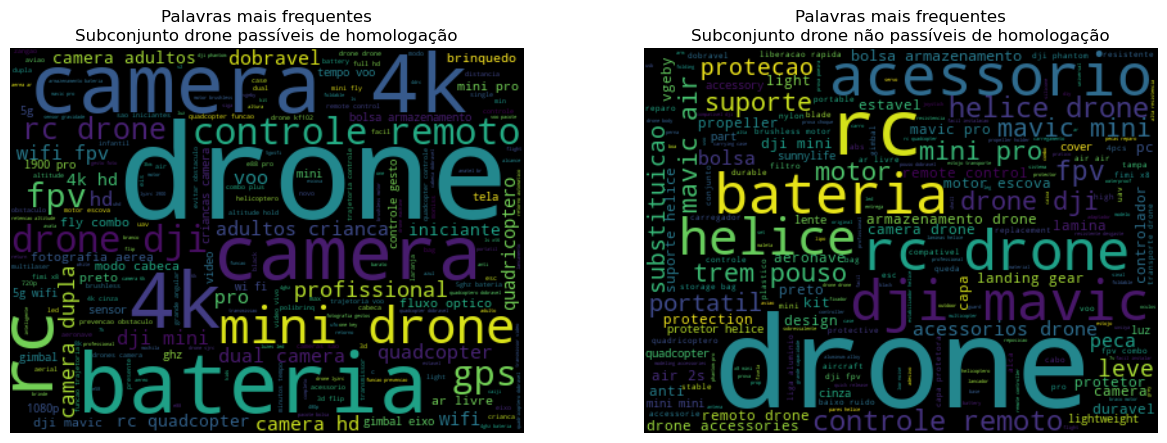

In [10]:
words_drone_passivel_homologacao = ' '.join(df_drones[df_drones['passivel_homologacao']==1]['doc'].to_list())
words_drone_nao_passivel_homologacao = ' '.join(df_drones[df_drones['passivel_homologacao']==0]['doc'].to_list())

wc_drone_passivel_homologacao = WordCloud(height=300).generate(words_drone_passivel_homologacao)
wc_drone_nao_passivel_homologacao = WordCloud(height=300).generate(words_drone_nao_passivel_homologacao)
  
fig,ax = plt.subplots(1,2,figsize=(15,5))
    
ax[0].imshow(wc_drone_passivel_homologacao, interpolation="bilinear")
ax[0].axis("off")
ax[0].set_title('Palavras mais frequentes\nSubconjunto drone passíveis de homologação')

ax[1].imshow(wc_drone_nao_passivel_homologacao, interpolation="bilinear")
ax[1].axis("off")
ax[1].set_title('Palavras mais frequentes\nSubconjunto drone não passíveis de homologação')

plt.show()


# Treinamento do classificador

## Classificador de linha base

### Preparação dos dados

In [11]:
from sklearn.dummy import DummyClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [12]:
from sklearn.exceptions import UndefinedMetricWarning
import warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [13]:
docs = df_items[df_items['passivel_homologacao']<=1]['doc']
labels = df_items[df_items['passivel_homologacao']<=1]['passivel_homologacao']

X_train, X_test, y_train, y_test = train_test_split(docs, labels, test_size=0.25, random_state=724)

### Classificador Dummy

Accuracy of Dummy classifier on training set: 0.573
Accuracy of Dummy classifier on test set: 0.578
AUC of Dummy classifier on test set: 0.500

                              precision    recall  f1-score   support

Não passíveis de homologação       0.00      0.00      0.00      1853
    Passíveis de homologação       0.58      1.00      0.73      2533

                    accuracy                           0.58      4386
                   macro avg       0.29      0.50      0.37      4386
                weighted avg       0.33      0.58      0.42      4386



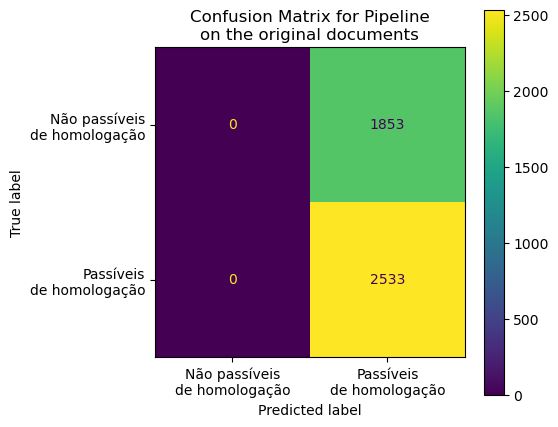

In [14]:
clf_dummy = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', DummyClassifier())])
clf_dummy.fit(X_train,y_train)
predicted = clf_dummy.predict(X_test)

target_names = ['Não passíveis de homologação','Passíveis de homologação']
target_names_confusion = ['Não passíveis\nde homologação','Passíveis\nde homologação']

print('Accuracy of Dummy classifier on training set: {:.3f}'
     .format(clf_dummy.score(X_train, y_train)))
print('Accuracy of Dummy classifier on test set: {:.3f}'
     .format(clf_dummy.score(X_test, y_test)))
print('AUC of Dummy classifier on test set: {:.3f}'
     .format(roc_auc_score(y_test,clf_dummy.predict_proba(X_test)[:,1])))

print()
print(classification_report(y_test, predicted, target_names=target_names))

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(y_test, predicted, ax=ax)
ax.xaxis.set_ticklabels(target_names_confusion)
ax.yaxis.set_ticklabels(target_names_confusion)
_ = ax.set_title(f"Confusion Matrix for {clf_dummy.__class__.__name__}\non the original documents")


### Classificador SGD

#### Parâmetros padrão

Accuracy of SGD classifier on training set: 0.941
Accuracy of SGD classifier on test set: 0.907
AUC of SGD classifier on test set: 0.963

                              precision    recall  f1-score   support

Não passíveis de homologação       0.91      0.86      0.89      1853
    Passíveis de homologação       0.90      0.94      0.92      2533

                    accuracy                           0.91      4386
                   macro avg       0.91      0.90      0.90      4386
                weighted avg       0.91      0.91      0.91      4386



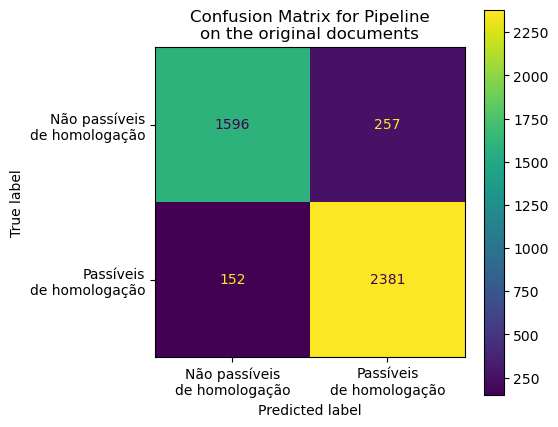

In [15]:
clf_sgd = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', SGDClassifier(loss='log_loss'))])
clf_sgd.fit(X_train,y_train)
predicted = clf_sgd.predict(X_test)

print('Accuracy of SGD classifier on training set: {:.3f}'
     .format(clf_sgd.score(X_train, y_train)))
print('Accuracy of SGD classifier on test set: {:.3f}'
     .format(clf_sgd.score(X_test, y_test)))
print('AUC of SGD classifier on test set: {:.3f}'
     .format(roc_auc_score(y_test,clf_sgd.predict_proba(X_test)[:,1])))

print()
print(classification_report(y_test, predicted, target_names=target_names))

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(y_test, predicted, ax=ax)
ax.xaxis.set_ticklabels(target_names_confusion)
ax.yaxis.set_ticklabels(target_names_confusion)
_ = ax.set_title(f"Confusion Matrix for {clf_sgd.__class__.__name__}\non the original documents")

#### Pesquisa de parâmetros

In [16]:
# 'vectorizer__ngram_range': [(1,1), (1,2), (1,3), (2,2), (2,3)]
# 'vectorizer__max_df': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# 'vectorizer__min_df': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# 'vectorizer__max_features': [5000,10000,15000,25000,30000,None]
# 'vectorizer__binary': [False, True]
# 'transformer__use_idf': [False, True]
# 'clf__loss': ['log_loss', 'modified_huber']
# 'clf__penalty': ['l1', 'l2']
# 'clf__alpha': [0.0001, 0.00001, 0.000001]


In [17]:
%%time
# vetorizar as palavras por contagem
vectorizer = CountVectorizer()

# transformar vetores aplicando TF-IDF
transformer = TfidfTransformer()

# classificardor SGD
clf = SGDClassifier()

# juntar tudo em pipeline
pipe = Pipeline(steps = [('vectorizer',vectorizer),('transformer',transformer),('clf',clf)])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    'vectorizer__ngram_range': [(1,1), (1,2), (1,3)],
    'transformer__use_idf': [False, True],
    'clf__loss': ['log_loss', 'modified_huber'],
    'clf__penalty': ['l1', 'l2'],
    'clf__alpha': [0.0001, 0.00001, 0.000001]
}

search = GridSearchCV(pipe, param_grid, n_jobs=6, scoring='roc_auc')
search.fit(docs, labels)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.971):
{'clf__alpha': 1e-05, 'clf__loss': 'log_loss', 'clf__penalty': 'l2', 'transformer__use_idf': True, 'vectorizer__ngram_range': (1, 2)}
CPU times: total: 5.19 s
Wall time: 1min 8s


#### Pesquisa de parâmetros complementar
Observar o efeito da quantidade de palavras na classificação

In [18]:
%%time
# vetorizar as palavras por contagem
vectorizer = CountVectorizer(ngram_range=(1,2))

# transformar vetores aplicando TF-IDF
transformer = TfidfTransformer(use_idf=True)

# classificardor SGD
clf = SGDClassifier(alpha=1e-5,loss='log_loss',penalty='l2')

# juntar tudo em pipeline
pipe = Pipeline(steps = [('vectorizer',vectorizer),('transformer',transformer),('clf',clf)])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    'vectorizer__min_df': [1,2,3,4,5,10,15,20]
}

search = GridSearchCV(pipe, param_grid, n_jobs=6, scoring='roc_auc')
search.fit(docs, labels)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.971):
{'vectorizer__min_df': 1}
CPU times: total: 2.08 s
Wall time: 5.43 s


In [19]:
search.cv_results_

{'mean_fit_time': array([0.8421093 , 0.58731456, 0.53924098, 0.5071032 , 0.48571711,
        0.47356558, 0.50741253, 0.4562253 ]),
 'std_fit_time': array([0.01611574, 0.02941413, 0.00923721, 0.0226396 , 0.02761649,
        0.01646509, 0.00640865, 0.02606718]),
 'mean_score_time': array([0.14120088, 0.12623415, 0.11824574, 0.1191741 , 0.11763992,
        0.10015121, 0.09615388, 0.07745552]),
 'std_score_time': array([0.00385737, 0.00531235, 0.00524778, 0.00878431, 0.01676633,
        0.00824581, 0.01227213, 0.0114217 ]),
 'param_vectorizer__min_df': masked_array(data=[1, 2, 3, 4, 5, 10, 15, 20],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'vectorizer__min_df': 1},
  {'vectorizer__min_df': 2},
  {'vectorizer__min_df': 3},
  {'vectorizer__min_df': 4},
  {'vectorizer__min_df': 5},
  {'vectorizer__min_df': 10},
  {'vectorizer__min_df': 15},
  {'vectorizer__min_df': 20}],
 'split0_test_score': a

#### Classificador com melhores parâmetros (pipeline)

Accuracy of SGD classifier on training set: 0.979
Accuracy of SGD classifier on test set: 0.917
AUC of SGD classifier on training set: 0.997
AUC of SGD classifier on test set: 0.970

                              precision    recall  f1-score   support

Não passíveis de homologação       0.91      0.89      0.90      1856
    Passíveis de homologação       0.92      0.93      0.93      2530

                    accuracy                           0.92      4386
                   macro avg       0.92      0.91      0.91      4386
                weighted avg       0.92      0.92      0.92      4386



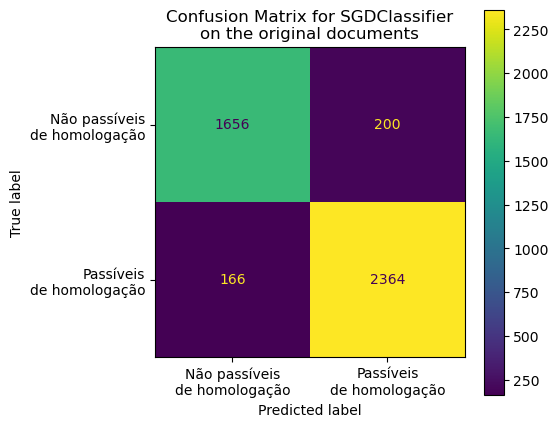

In [20]:
# vetorizar as palavras por contagem
tokenizer = lambda doc: clean_text(doc, return_tokens=True)
vectorizer = CountVectorizer(ngram_range=(1,1))

# transformar vetores aplicando TF-IDF
transformer = TfidfTransformer(use_idf=True)

# classificardor SGD
clf = SGDClassifier(alpha=1e-5, loss='log_loss', penalty='l2')

# juntar tudo em pipeline
pipe = Pipeline(steps = [('vectorizer',vectorizer),('transformer',transformer),('clf',clf)])

docs = df_items[df_items['passivel_homologacao']<=1]['titulo']
labels = df_items[df_items['passivel_homologacao']<=1]['passivel_homologacao']

X_train, X_test, y_train, y_test = train_test_split(docs, labels, test_size=0.25, random_state=123)

pipe.fit(X_train,y_train)

predicted = pipe.predict(X_test)

print('Accuracy of SGD classifier on training set: {:.3f}'
     .format(pipe.score(X_train, y_train)))
print('Accuracy of SGD classifier on test set: {:.3f}'
     .format(pipe.score(X_test, y_test)))
print('AUC of SGD classifier on training set: {:.3f}'
     .format(roc_auc_score(y_train,pipe.predict_proba(X_train)[:,1])))
print('AUC of SGD classifier on test set: {:.3f}'
     .format(roc_auc_score(y_test,pipe.predict_proba(X_test)[:,1])))

print()
print(classification_report(y_test, predicted, target_names=target_names))

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(y_test, predicted, ax=ax)
ax.xaxis.set_ticklabels(target_names_confusion)
ax.yaxis.set_ticklabels(target_names_confusion)
_ = ax.set_title(f"Confusion Matrix for {pipe['clf'].__class__.__name__}\non the original documents")

#### Palavras mais relevantes para classificação

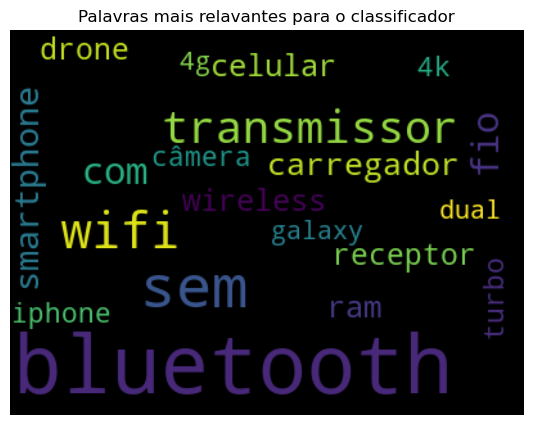

In [21]:
n_top_features = 20
label = target_names[-1]
feature_names = pipe['vectorizer'].get_feature_names_out()
X_train_count_vectors = pipe['vectorizer'].transform(X_train)
X_train_tfidf_vectors = pipe['transformer'].transform(X_train_count_vectors)
clf_coef = pipe['clf'].coef_
average_feature_effects = clf_coef * np.asarray(X_train_tfidf_vectors.mean(axis=0)).ravel()

top_indices = np.argsort(average_feature_effects[0])[-n_top_features:][::-1]
top = pd.DataFrame(feature_names[top_indices], columns=[label])
predictive_words = feature_names[top_indices]

top_featrues_frequency = {word:relevance for word,relevance in zip(predictive_words,average_feature_effects[0, top_indices])}
wc_top_featrues_frequency = WordCloud(height=300,random_state=100).generate_from_frequencies(top_featrues_frequency)
 
fig,ax = plt.subplots(1,1,figsize=(8,5))   
ax.imshow(wc_top_featrues_frequency, interpolation="bilinear")
ax.axis("off")
ax.set_title('Palavras mais relavantes para o classificador')
plt.show()

#### Análise de falsos negativos e positivos

In [22]:
def confusion_results(ground_truth,predicted):
    if ground_truth==0 and predicted==0:
        return 'TN'
    elif ground_truth==1 and predicted==1:
        return 'TP'
    elif ground_truth==0 and predicted==1:
        return 'FP'
    elif ground_truth==1 and predicted==0:
        return 'FN'
    else:
        return '#ERROR#'
        
df_test = pd.DataFrame(X_test)
df_test = df_test.join(df_items[['id','doc']])
df_test['link_to_fiscaliza'] = df_test['id'].apply(lambda id: f'https://sistemas.anatel.gov.br/fiscaliza/issues/{id}')
df_test['ground_truth'] = y_test
df_test['predicted'] = predicted
df_test['confusion_results'] = df_test[['ground_truth','predicted']].apply(lambda x: confusion_results(x['ground_truth'],x['predicted']),axis=1)
df_test

,titulo,id,doc,link_to_fiscaliza,ground_truth,predicted,confusion_results
16744,Mouse sem fio Logitech M190 - Projeto de curva...,143371,mouse fio logitech m190 projeto curva ambidest...,https://sistemas.anatel.gov.br/fiscaliza/issue...,1,0,FN
7576,2 Pcs Transmissor Fm para Carro | som em nível...,132792,2 pcs transmissor fm carro som nivel transmiss...,https://sistemas.anatel.gov.br/fiscaliza/issue...,1,1,TP
15940,"Motor De Engrenagem, Motor De Engrenagem De La...",142567,motor engrenagem motor engrenagem lat dc12v 31...,https://sistemas.anatel.gov.br/fiscaliza/issue...,0,0,TN
10463,CAIFENG Peças de reposição para reparo de plac...,136578,caifeng pecas reposicao reparo placa porta car...,https://sistemas.anatel.gov.br/fiscaliza/issue...,0,0,TN
17298,s para cães - Pet portátil cão passos antiderr...,143925,caes pet portatil cao passos antiderrapantes r...,https://sistemas.anatel.gov.br/fiscaliza/issue...,0,0,TN
...,...,...,...,...,...,...,...
18166,"Adaptador de Som BT 5.0, Transmissor ReceptorU...",145885,adaptador som bt 5.0 transmissor receptorusb c...,https://sistemas.anatel.gov.br/fiscaliza/issue...,1,1,TP
4404,DESHENG Clipes de proteção para smartphone est...,129620,desheng clipes protecao smartphone estampa flo...,https://sistemas.anatel.gov.br/fiscaliza/issue...,0,0,TN
8238,Antena TV Aberta Digital HDTV 4k Interna Exter...,133454,antena tv aberta digital hdtv 4k interna exter...,https://sistemas.anatel.gov.br/fiscaliza/issue...,0,0,TN
4826,"Câmera de Segurança Doméstica, Tela IPS de 2,8...",130042,"camera seguranca domestica tela ips 2,8 polega...",https://sistemas.anatel.gov.br/fiscaliza/issue...,1,1,TP


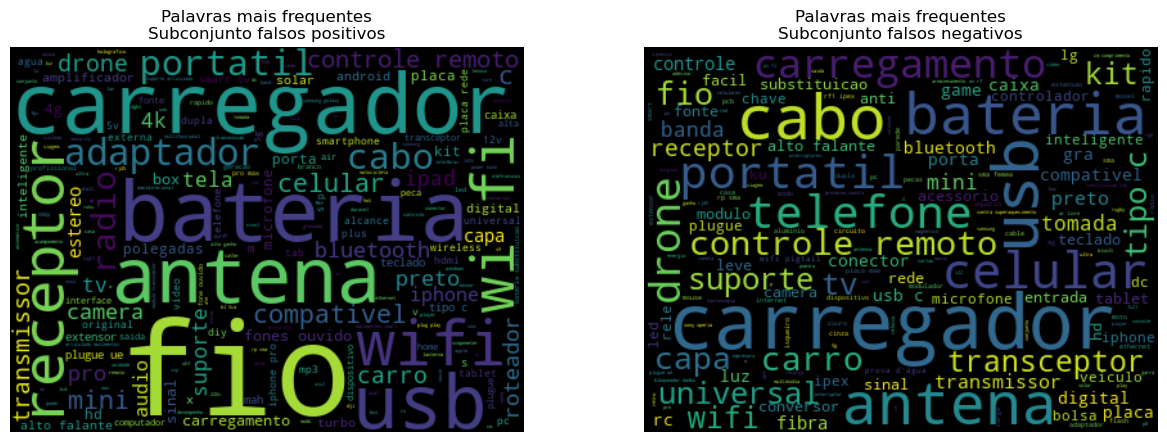

In [23]:
fp_words = ' '.join(df_test[df_test['confusion_results']=='FP']['doc'].to_list())
fn_words = ' '.join(df_test[df_test['confusion_results']=='FN']['doc'].to_list())

wc_fp = WordCloud(height=300).generate(fp_words)
wc_fn = WordCloud(height=300).generate(fn_words)
  
fig,ax = plt.subplots(1,2,figsize=(15,5))
    
ax[0].imshow(wc_fp, interpolation="bilinear")
ax[0].axis("off")
ax[0].set_title('Palavras mais frequentes\nSubconjunto falsos positivos')

ax[1].imshow(wc_fn, interpolation="bilinear")
ax[1].axis("off")
ax[1].set_title('Palavras mais frequentes\nSubconjunto falsos negativos')

plt.show()